
# Project: - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment . A number of characteristics about the patient are included in each row.


### Question(s) for Analysis
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?  
> **Q1**: Is there a relationship between the patient’s gender and their attendence?  
> **Q2**: Does patient’s age affect attendance?  
> **Q3**: Does sending reminder SMS affect attendance?


In [116]:
# import all packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## **Data Wrangling**

> In this section I will load the data, check for cleanliness, and clean the data for analysis

In [377]:
# load data and view out a few lines
df=pd.read_csv('noshowapp_dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [353]:
# view dimensions of dataframe
df.shape

(110527, 14)

In [355]:
#  identify the structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values

In [357]:
# view statistical characteristics of the numerical data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There are invalid values in the dataset:

- -1 value in the **Age** column, which is not possible since age cannot be negative

-  4 value in the **Handicap** column, the Handicap column should only contain 0 and 1

In [363]:
# return unique values
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

The numbers 2, 3, and 4 are repeated, which is illogical since 0 = no and 1 = yes

In [365]:
# view duplicated
df.duplicated().sum()

0

There are no duplicated rows


### Data Cleaning
> In this section, I will rename column with spelling errors, change the data types of certain columns, remove rows containing irrational values, and remove unnecessary columns
 

In [379]:
# rename column and view dataframe to check
df.rename(columns={'No-show': 'No_show',
                   'Hipertension': 'Hypertension',
                   'Handcap': 'Handicap'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [387]:
# change data type columns and view dataframe to check
df_appointment[['PatientId']] = df[['PatientId']].astype('int')
df_appointment[['Gender', 'No_show']] = df[['Gender', 'No_show']].astype('category')
df_appointment['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df_appointment['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df_appointment.dtypes

PatientId                       int32
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                      category
dtype: object

**category** data type helps for save memory and improve performance  
**datetime** data type is more efficient and flexible for dates

In [381]:
# remove -1 value and view dataframe to check
df.drop(df[df['Age'] == -1].index, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now, the min value for age is 0

In [406]:
# remove 2,3,4 values in Handicap column and view dataframe to check
df = df[df['Handicap'].isin([0, 1])]
df.describe()

,PatientId,AppointmentID,Age,Alcoholism,Handicap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000
mean,-2.140298e+09,5.675298e+06,37.070753,0.030382,0.018509,0.321182
std,1.509849e+08,7.129883e+04,23.098052,0.171638,0.134782,0.466932
min,-2.147484e+09,5.030230e+06,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640278e+06,18.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680567e+06,37.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725508e+06,55.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000


Now the, the Handicap valueus is 0 and 1

In [383]:
# remove unneccessary data and view dataframe to check
df.drop(['Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes'], axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,0,No


## Data Wrangling Summary

> I loaded the dataset, checked the number of rows and columns using shape, and used the info function to identify missing values and data types. Then, I discovered irrational values in the (Age) and (Handicap) columns using describe. I checked for duplicated rows and found that there were none. I corrected the names of two columns in the dataset (Handicap) and (No_show), then changed the data type of a column to save memory and improve efficiency. After that, I removed the irrational values in the (Age) and (Handicap) columns that I had discovered earlier. Finally, I deleted unnecessary columns for the project.

<a id='eda'></a>
## **Exploratory Data Analysis**

> Now that I have cleaned and prepared the data, I will proceed with the exploration phase. I plan to compute statistics and create visualizations to address the questions outlined in the introduction section

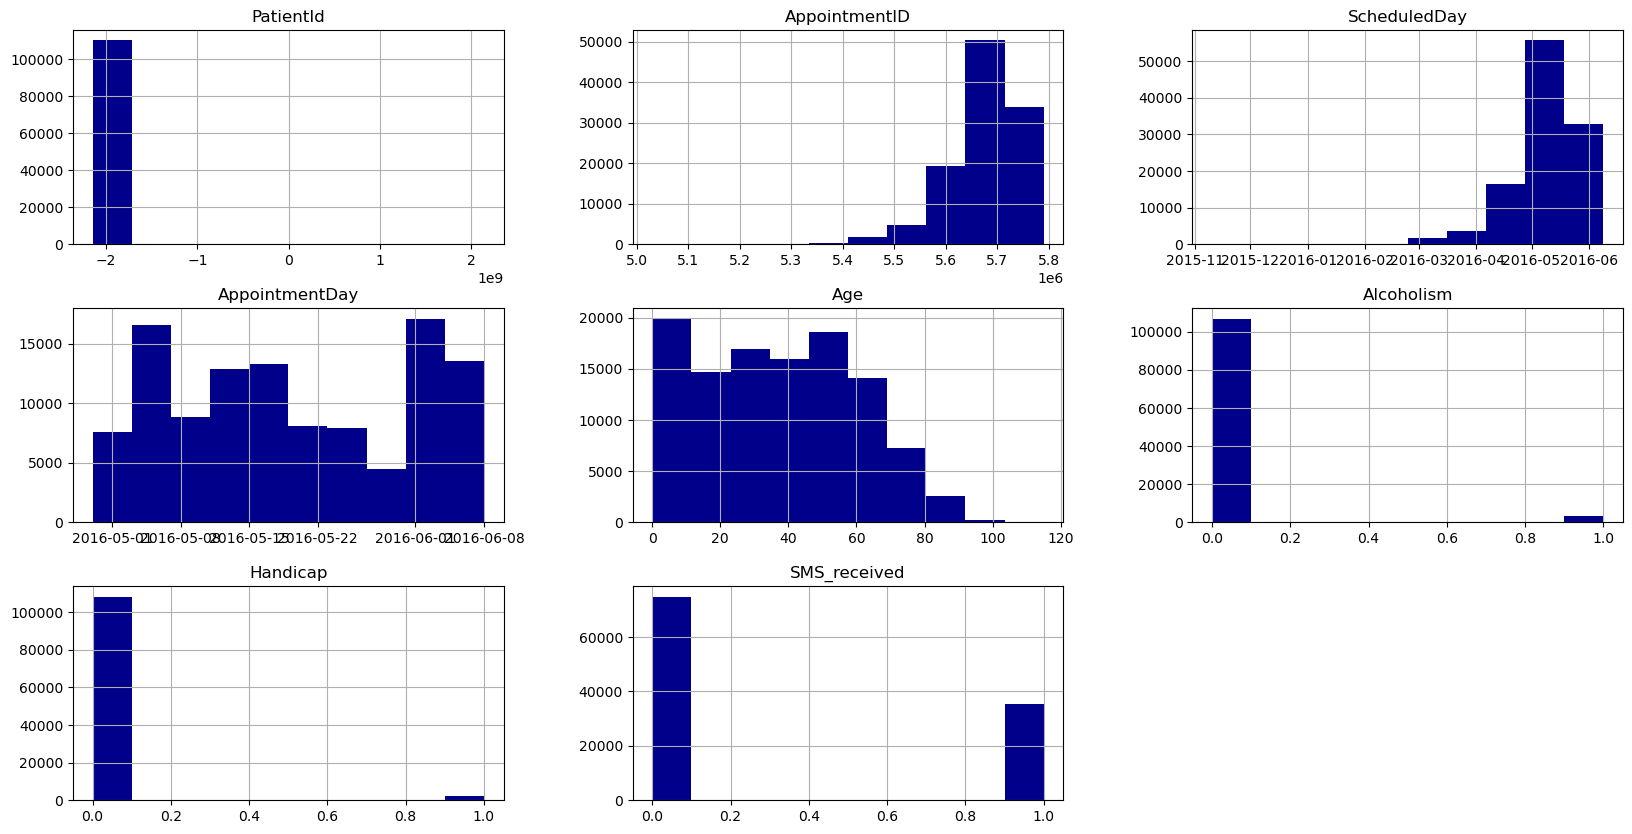

In [408]:
# create a histogram of all columns, to take a general look
df.hist(figsize=(20,10), color='darkblue');

In [410]:
df.groupby('No_show').size()

C:\Users\Shahad\AppData\Local\Temp\ipykernel_8072\3607768127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('No_show').size()


No_show
No     88049
Yes    22278
dtype: int64

In general,  
**88049** is the number of patients who attended thier appointment  
**22278** is the number of patients who missed thier appointment

### **Q1: Is there a relationship between the patient’s gender and their attendence?**

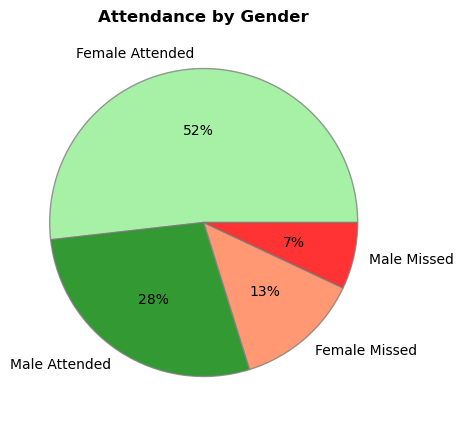

In [393]:
# define function
def attendance_by_gender(df):
    attended_gender = df[df['No_show'] == 'No']['Gender']
    missed_gender = df[df['No_show'] == 'Yes']['Gender']

# calculate the number of females and males who attended and missed
attended_counts = attended_gender.value_counts()
missed_counts = missed_gender.value_counts()

# create a list containing the counts of females and males who attended and missed
attendance_gender =[attended_counts.get('F', 0),
                    attended_counts.get('M', 0),
                    missed_counts.get('F', 0),
                    missed_counts.get('M', 0)]

# create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(attendance_gender, labels=['Female Attended', 'Male Attended', 'Female Missed', 'Male Missed'],
        colors=['lightgreen', 'green', 'coral', 'red'],
        autopct='%1.0f%%',
        wedgeprops={'edgecolor': 'grey', 'alpha': 0.8})
plt.title('Attendance by Gender', fontweight='bold')

# display the plot
plt.show()

# call the function
attendance_by_gender(df)

In [395]:
df["Gender"].value_counts()

Gender
F    71730
M    38597
Name: count, dtype: int64

>  **Patients Who Attended (Green Color):**
> - The number of females who attended their appointments is higher than that of males, which may suggest that females are more committed to show thier appointments


> **Patients Who Missed Appointments (Red and orange Color):**
> - The missed rates are similar between males and females

### **Q2: Does patient’s age affect attendance?**

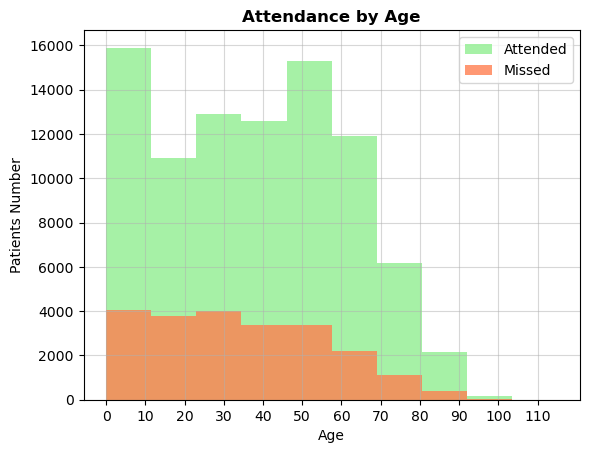

<Figure size 700x500 with 0 Axes>

In [398]:
# define function
def attendance_by_age(df):

    # create a histogram
    plt.figure(figsize=(7,5))
plt.hist(df[df['No_show'] == 'No']['Age'], bins=10, color='lightgreen', alpha=0.8, label='Attended')
plt.hist(df[df['No_show'] == 'Yes']['Age'], bins=10, color='coral', alpha=0.8, label='Missed')
plt.grid(alpha=0.5)
plt.title('Attendance by Age',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Patients Number')
plt.xticks(range(0, 120, 10))
plt.legend()

# display the hist
plt.show()

# call the function
attendance_by_age(df)


In [400]:
# find the mean age for attended and missed patients
attended_mean_age = df[df['No_show'] == 'No']['Age'].mean()
missed_mean_age = df[df['No_show'] == 'Yes']['Age'].mean()
print(round(attended_mean_age))
print(round(missed_mean_age))

38
34


> **Patients Who Attended (Green Color):**  
> - The average age of patients who attended their appointments is 38, indicating that older individuals tend to be more committed to their appointemts
> - Middle-aged people also show a good level of commitment to their appointments

> **Patients Who Missed Appointments (Orange Color):**
> - The average age of patients who missed their appointments is 34, , suggesting younger people are more likely to skip them thier appointment
> - Older patients are less likely to miss appointments, likely because they have ongoing health issues that need regular treatment or a greater awareness of their healthcare needs

### **Q3: Does sending reminder SMS affect attendance?**

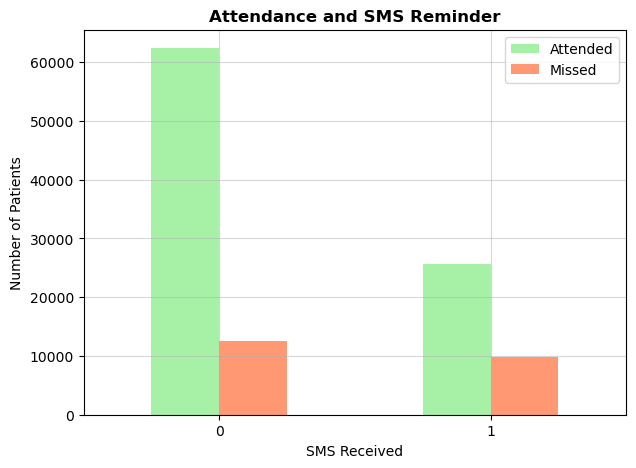

In [402]:
# define function
def plot_attendance_sms(df):

    # calculate the number of patients who received SMS and didn't
    attendance_sms = df.groupby('SMS_received')['No_show'].value_counts().unstack()

# create a bar plot
attendance_sms.plot(kind='bar', figsize=(7,5), color=['lightgreen', 'coral'], alpha=0.8)
plt.grid(alpha=0.5)
plt.title('Attendance and SMS Reminder', fontweight='bold')
plt.xlabel('SMS Received')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(labels=['Attended', 'Missed'])

# display the plot
plt.show()

# call the function
plot_attendance_sms(df)


In [404]:
df["SMS_received"].value_counts()

SMS_received
0    74892
1    35435
Name: count, dtype: int64

> The chart illustrates the attendance rates for patients who received SMS reminders compared to those who didn't. The data indicates that patients who received SMS reminders were more likely to attend their appointments. This indicates that sending reminder SMS could potentially reduce appointment absences

<a id='conclusions'></a>
## **Conclusions**

The analysis of appointment attendance revealed several key insights:
- female patients demonstrated higher attendance rates than males, suggesting that they may be more committed to attending medical appointments. However, the missed appointment rates were relatively similar between both genders, indicating that gender alone may not be a strong predictor of no-shows. Further investigation into external factors such as employment status, family responsibilities, or access to transportation could provide a more comprehensive understanding.

- Age was found to be an important factor influencing attendance. Older patients were more likely to attend their appointments, potentially due to ongoing health concerns requiring consistent medical care or a greater awareness of their healthcare needs. In contrast, younger individuals exhibited a higher no-show rate, possibly due to lifestyle factors, work commitments, or lower prioritization of preventive healthcare.

- SMS reminders appeared to have a positive impact on attendance rates. Patients who received reminders were more likely to attend their appointments compared to those who did not. However, it is essential to acknowledge that correlation does not imply causation—other factors such as patient motivation, urgency of the medical issue, or accessibility to healthcare facilities could also influence attendance.


## **Limitation**

This study provides useful insights but has some limitations. It does not consider social and economic factors, the distance to healthcare centers, or psychological reasons for missing appointments. Also, the data does not show if patients who missed their appointments rescheduled or found other healthcare options. Additionally, removing missing values may lead to losing important data, which could affect the accuracy of the results.

Overall, understanding patient attendance can help healthcare providers improve scheduling and reminder systems. By addressing the reasons behind missed appointments, hospitals can improve patient care, reduce wasted resources, and make the healthcare system more efficient.








